### Student Information
Name: 全璨輝

Student ID: F74097073

GitHub ID: daumkakao1203

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

Negative    197
Neutral     331
Positive    319
Name: count, dtype: int64
['Retardation is on the menu boys! WSB is so back Calls on retards', 'Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.', 'How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision? Seeing lots of red in the ticker.']
0     Negative
1     Positive
2      Neutral
3     Positive
4      Neutral
5     Positive
6     Negative
7     Positive
8     Positive
9      Neutral
10     Neutral
11    Positive
12    Positive
13    Positive
14     Neutral
15    Negative
16     Neutral
17    Positive
18     Neutral
19    Positive
20     Neutral
Name: sentiment, dtype: object
                                                 text sentiment
1   Retail giant TARGET has now de

[nltk_data] Downloading package punkt to /home/justin-
[nltk_data]     chun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/justin-
[nltk_data]     chun/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


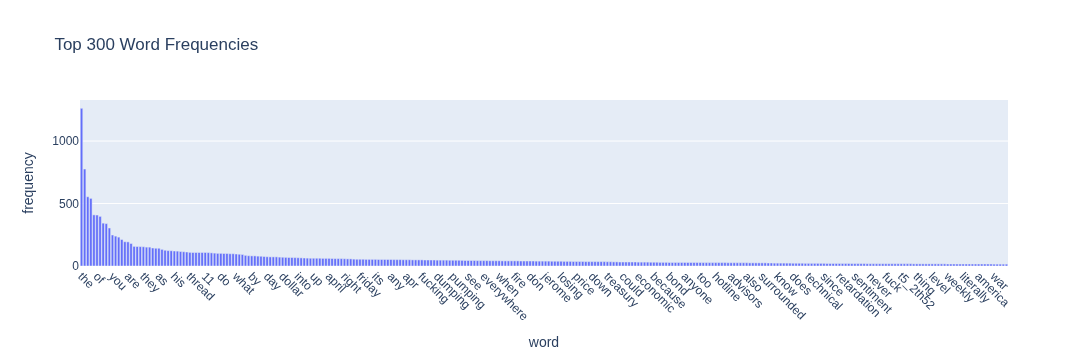

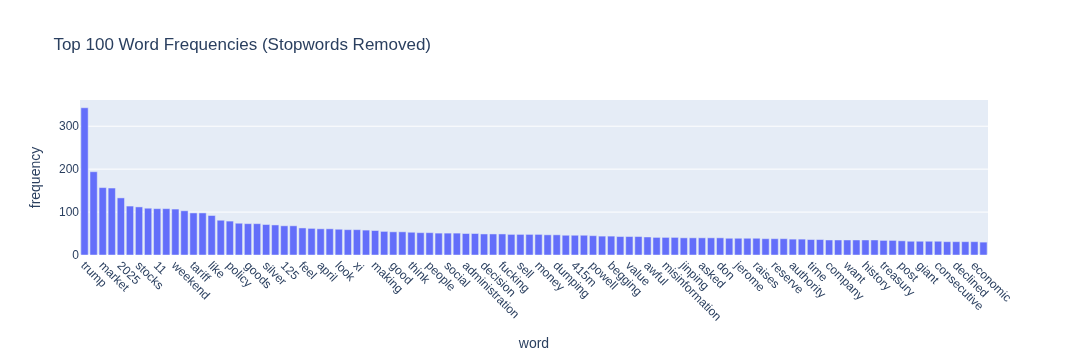

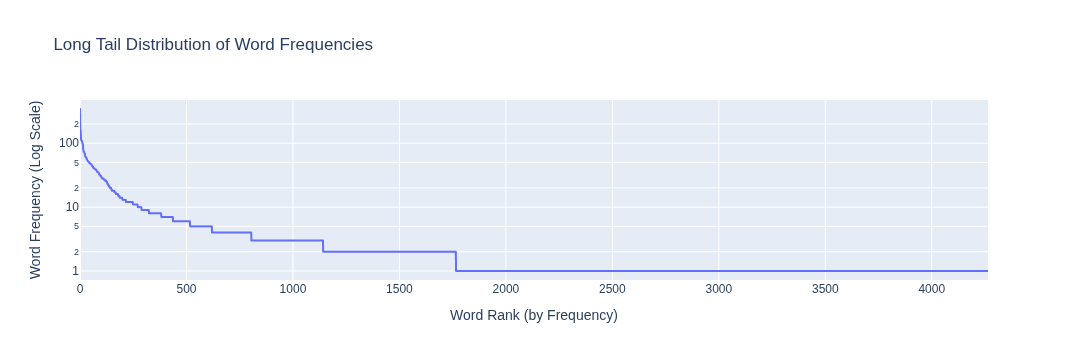

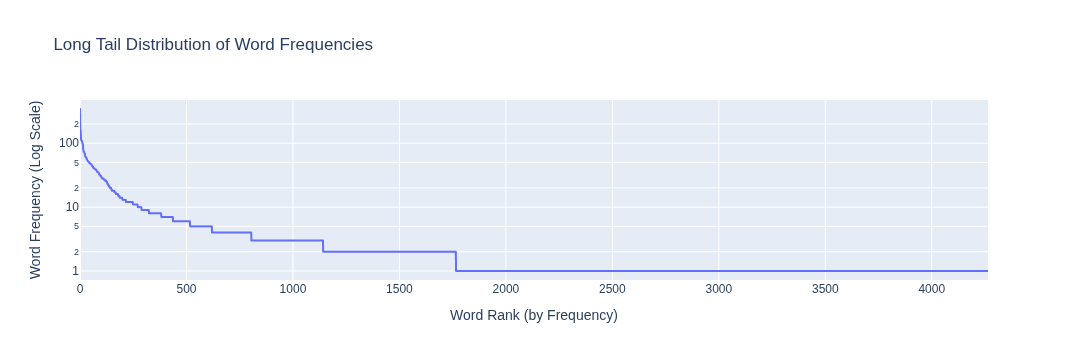

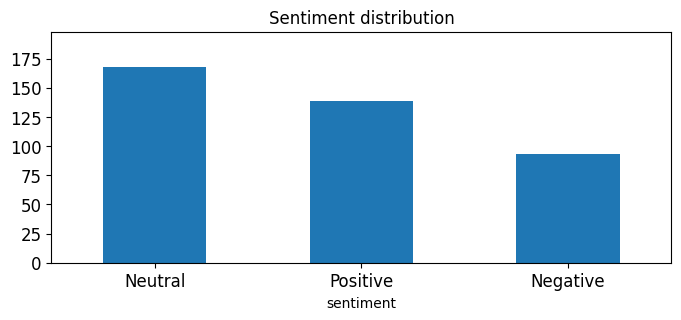

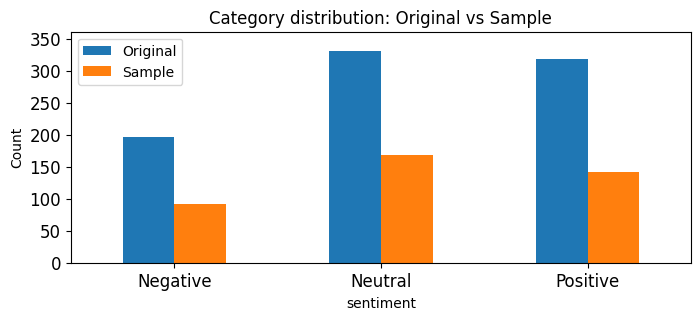

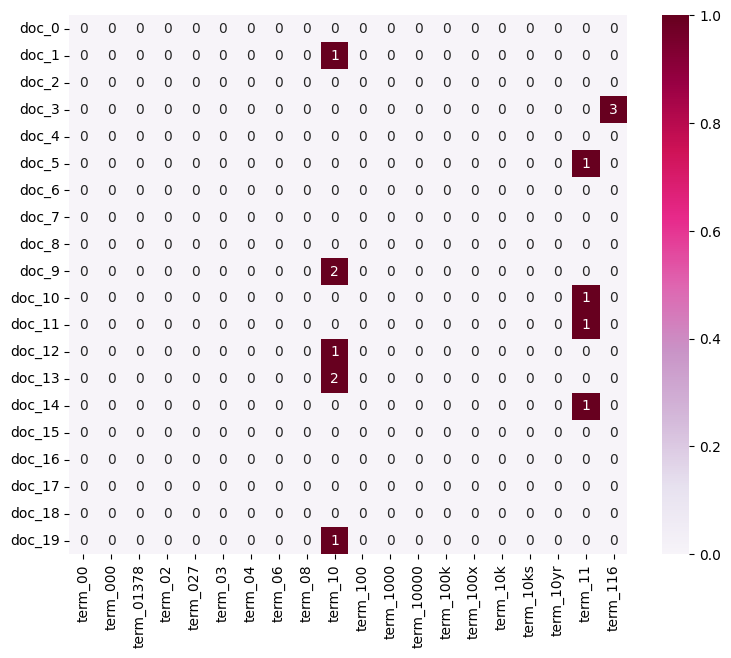

In [56]:
import pandas as pd
import numpy as np
from sklearn.utils import Bunch
from sklearn.feature_extraction.text import CountVectorizer

csv_path = "/home/justin-chun/DataMining/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv"
df = pd.read_csv(csv_path)

df["text"] = (df["title"].fillna("") + " " + df["text"].fillna("")).str.strip()

Label_map = {1.0: "Positive", 0.0: "Neutral", -1.0: "Negative"}

df = df[df["sentiment"].isin(Label_map.keys())].copy()
df["category"] = df["sentiment"].map(Label_map)

categories = ["Negative", "Neutral", "Positive"]
CAT2ID = {c: i for i, c in enumerate(categories)}
y = df["category"].map(CAT2ID).to_numpy()
texts = df["text"].tolist()
twenty_train = Bunch(
    data=texts,
    target=y,
    target_names=categories
)

count_vect = CountVectorizer(stop_words="english")
X_counts = count_vect.fit_transform(twenty_train.data)

import pandas as pd
print(pd.Series(twenty_train.target).value_counts().sort_index().rename(index=dict(enumerate(categories))))

#Ex1
print(texts[0:3])

import helpers.data_mining_helpers as dmh

X = pd.DataFrame({'text': texts})
X = X.reset_index(drop=True)
df = df.reset_index(drop=True)

X["sentiment"] = df["sentiment"].map(Label_map)
X.drop(columns=["category"], errors="ignore", inplace=True)

#Ex2
print(X.loc[:20,"sentiment"])

#Ex3
print(X[X["sentiment"] == "Positive"][::10][0:5])

X.isnull()
print(X.isnull().apply(lambda x: dmh.check_missing_values(x),axis = 1))

import matplotlib.pyplot as plt
%matplotlib inline
categories

print(X.sentiment.value_counts())
#Ex7
print(X_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           ylim = [0, X_sample.sentiment.value_counts().max()+30],
                                           rot = 0, fontsize = 12, figsize =(8,3)))

X_sample = X.sample(n=400)
#Ex8
original  = X['sentiment'].value_counts()
sample  = X_sample['sentiment'].value_counts()


cats = sorted(set(original.index) | set(sample.index))
counts = pd.concat([original.reindex(cats, fill_value=0),
                    sample.reindex(cats, fill_value=0)], axis=1)
counts.columns = ['Original', 'Sample'] 

ymax = counts.to_numpy().max() + 30

ax = counts.plot(kind='bar',
                 title='Category distribution: Original vs Sample',
                 rot=0, fontsize=12, figsize=(8,3))
ax.set_ylim(0, ymax)
ax.set_xlabel('sentiment')
ax.set_ylabel('Count')
print(ax.legend())

import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
print(X[0:4]["unigrams"])
X[0:4]
print(list(X[0:1]['unigrams']))

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])
analyze = count_vect.build_analyzer()
#Ex9
analyze(X.text[0])

print(X_counts[0:5, 0:100].toarray())
#Ex10
feature_names = count_vect.get_feature_names_out()

fourth_doc = X_counts[3,0:100]
non_zero_index = fourth_doc.indices
feature_in_fourth_doc = [feature_names[idx] for idx in non_zero_index]

print(f"features index indicates: {feature_in_fourth_doc}")

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() 

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#Ex12
import plotly.express as px

term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

df = pd.DataFrame({
    'word': count_vect.get_feature_names_out(),
    'frequency': term_frequencies
})

df_sorted = df.sort_values(by='frequency', ascending=False)
num_words_to_plot = min(300, len(df_sorted))

fig = px.bar(
    data_frame=df_sorted.head(num_words_to_plot),
    x='word',
    y='frequency',
    hover_data={'word': True, 'frequency': True},
    title=f'Top {num_words_to_plot} Word Frequencies'
)
fig.update_xaxes(tickangle=45)

fig.show()

#Ex13
count_vect_stopwords = CountVectorizer(stop_words='english')

X_counts_stopwords = count_vect_stopwords.fit_transform(X.text)
term_frequencies = np.asarray(X_counts_stopwords.sum(axis=0)).ravel()
df = pd.DataFrame({
    'word': count_vect_stopwords.get_feature_names_out(),
    'frequency': term_frequencies
})

df_sorted = df.sort_values(by='frequency', ascending=False)

num_words_to_plot = min(100, len(df_sorted))

fig = px.bar(
    data_frame=df_sorted.head(num_words_to_plot),
    x='word',
    y='frequency',
    hover_data={'word': True, 'frequency': True},
    title=f'Top {num_words_to_plot} Word Frequencies (Stopwords Removed)'
)

fig.update_xaxes(tickangle=45)

fig.show()

#Ex14

count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X.text)
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
df = pd.DataFrame({
    'word': count_vect.get_feature_names_out(),
    'frequency': term_frequencies
})

df_sorted = df.sort_values(by='frequency', ascending=False)

fig = px.line(
    data_frame=df_sorted,
    x=np.arange(len(df_sorted)),
    y='frequency',
    hover_name='word', 
    title='Long Tail Distribution of Word Frequencies'
)
fig.update_layout(
    xaxis_title='Word Rank (by Frequency)',
    yaxis_title='Word Frequency (Log Scale)',
    yaxis_type='log' 
)

fig.show()

#Ex15
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X.text)
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
df = pd.DataFrame({
    'word': count_vect.get_feature_names_out(),
    'frequency': term_frequencies
})
df_sorted = df.sort_values(by='frequency', ascending=False)
fig = px.line(
    data_frame=df_sorted,
    x=np.arange(len(df_sorted)),
    y='frequency',
    hover_name='word', 
    title='Long Tail Distribution of Word Frequencies'
)
fig.update_layout(
    xaxis_title='Word Rank (by Frequency)',
    yaxis_title='Word Frequency (Log Scale)',
    yaxis_type='log'
)

fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here